In [42]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import sys

import matplotlib
import numpy as np

matplotlib.rcParams["image.interpolation"] = "none"
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob

import tifffile
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.utils import Path, normalize
from stardist import random_label_cmap
from stardist.models import StarDist3D
from tifffile import imread

np.random.seed(6)
lbl_cmap = random_label_cmap()

In [43]:
# set path to the test image
image_file_path = pathlib.Path("../../data/z-stack_images/D3-1/D3-1_405.tif").resolve(
    strict=True
)

nuclei_z_stack = tifffile.imread(image_file_path)
print(nuclei_z_stack.shape)

(23, 1537, 1540)


In [44]:
# make a 3D tensor from the stack of 2D images
nuclei_z_stack.shape

(23, 1537, 1540)

In [45]:
# anisotropy correction
anisotropy = (1.0, 1.0, 10.0)  # x, y, z
z_slices = nuclei_z_stack.shape[0]
new_z_slices = int(z_slices * anisotropy[2])
new_z_stack = np.zeros((new_z_slices, nuclei_z_stack.shape[1], nuclei_z_stack.shape[2]))
for i in range(z_slices):
    new_z_stack[int(i * anisotropy[2])] = nuclei_z_stack[i]

assert new_z_stack.shape[0] == new_z_slices

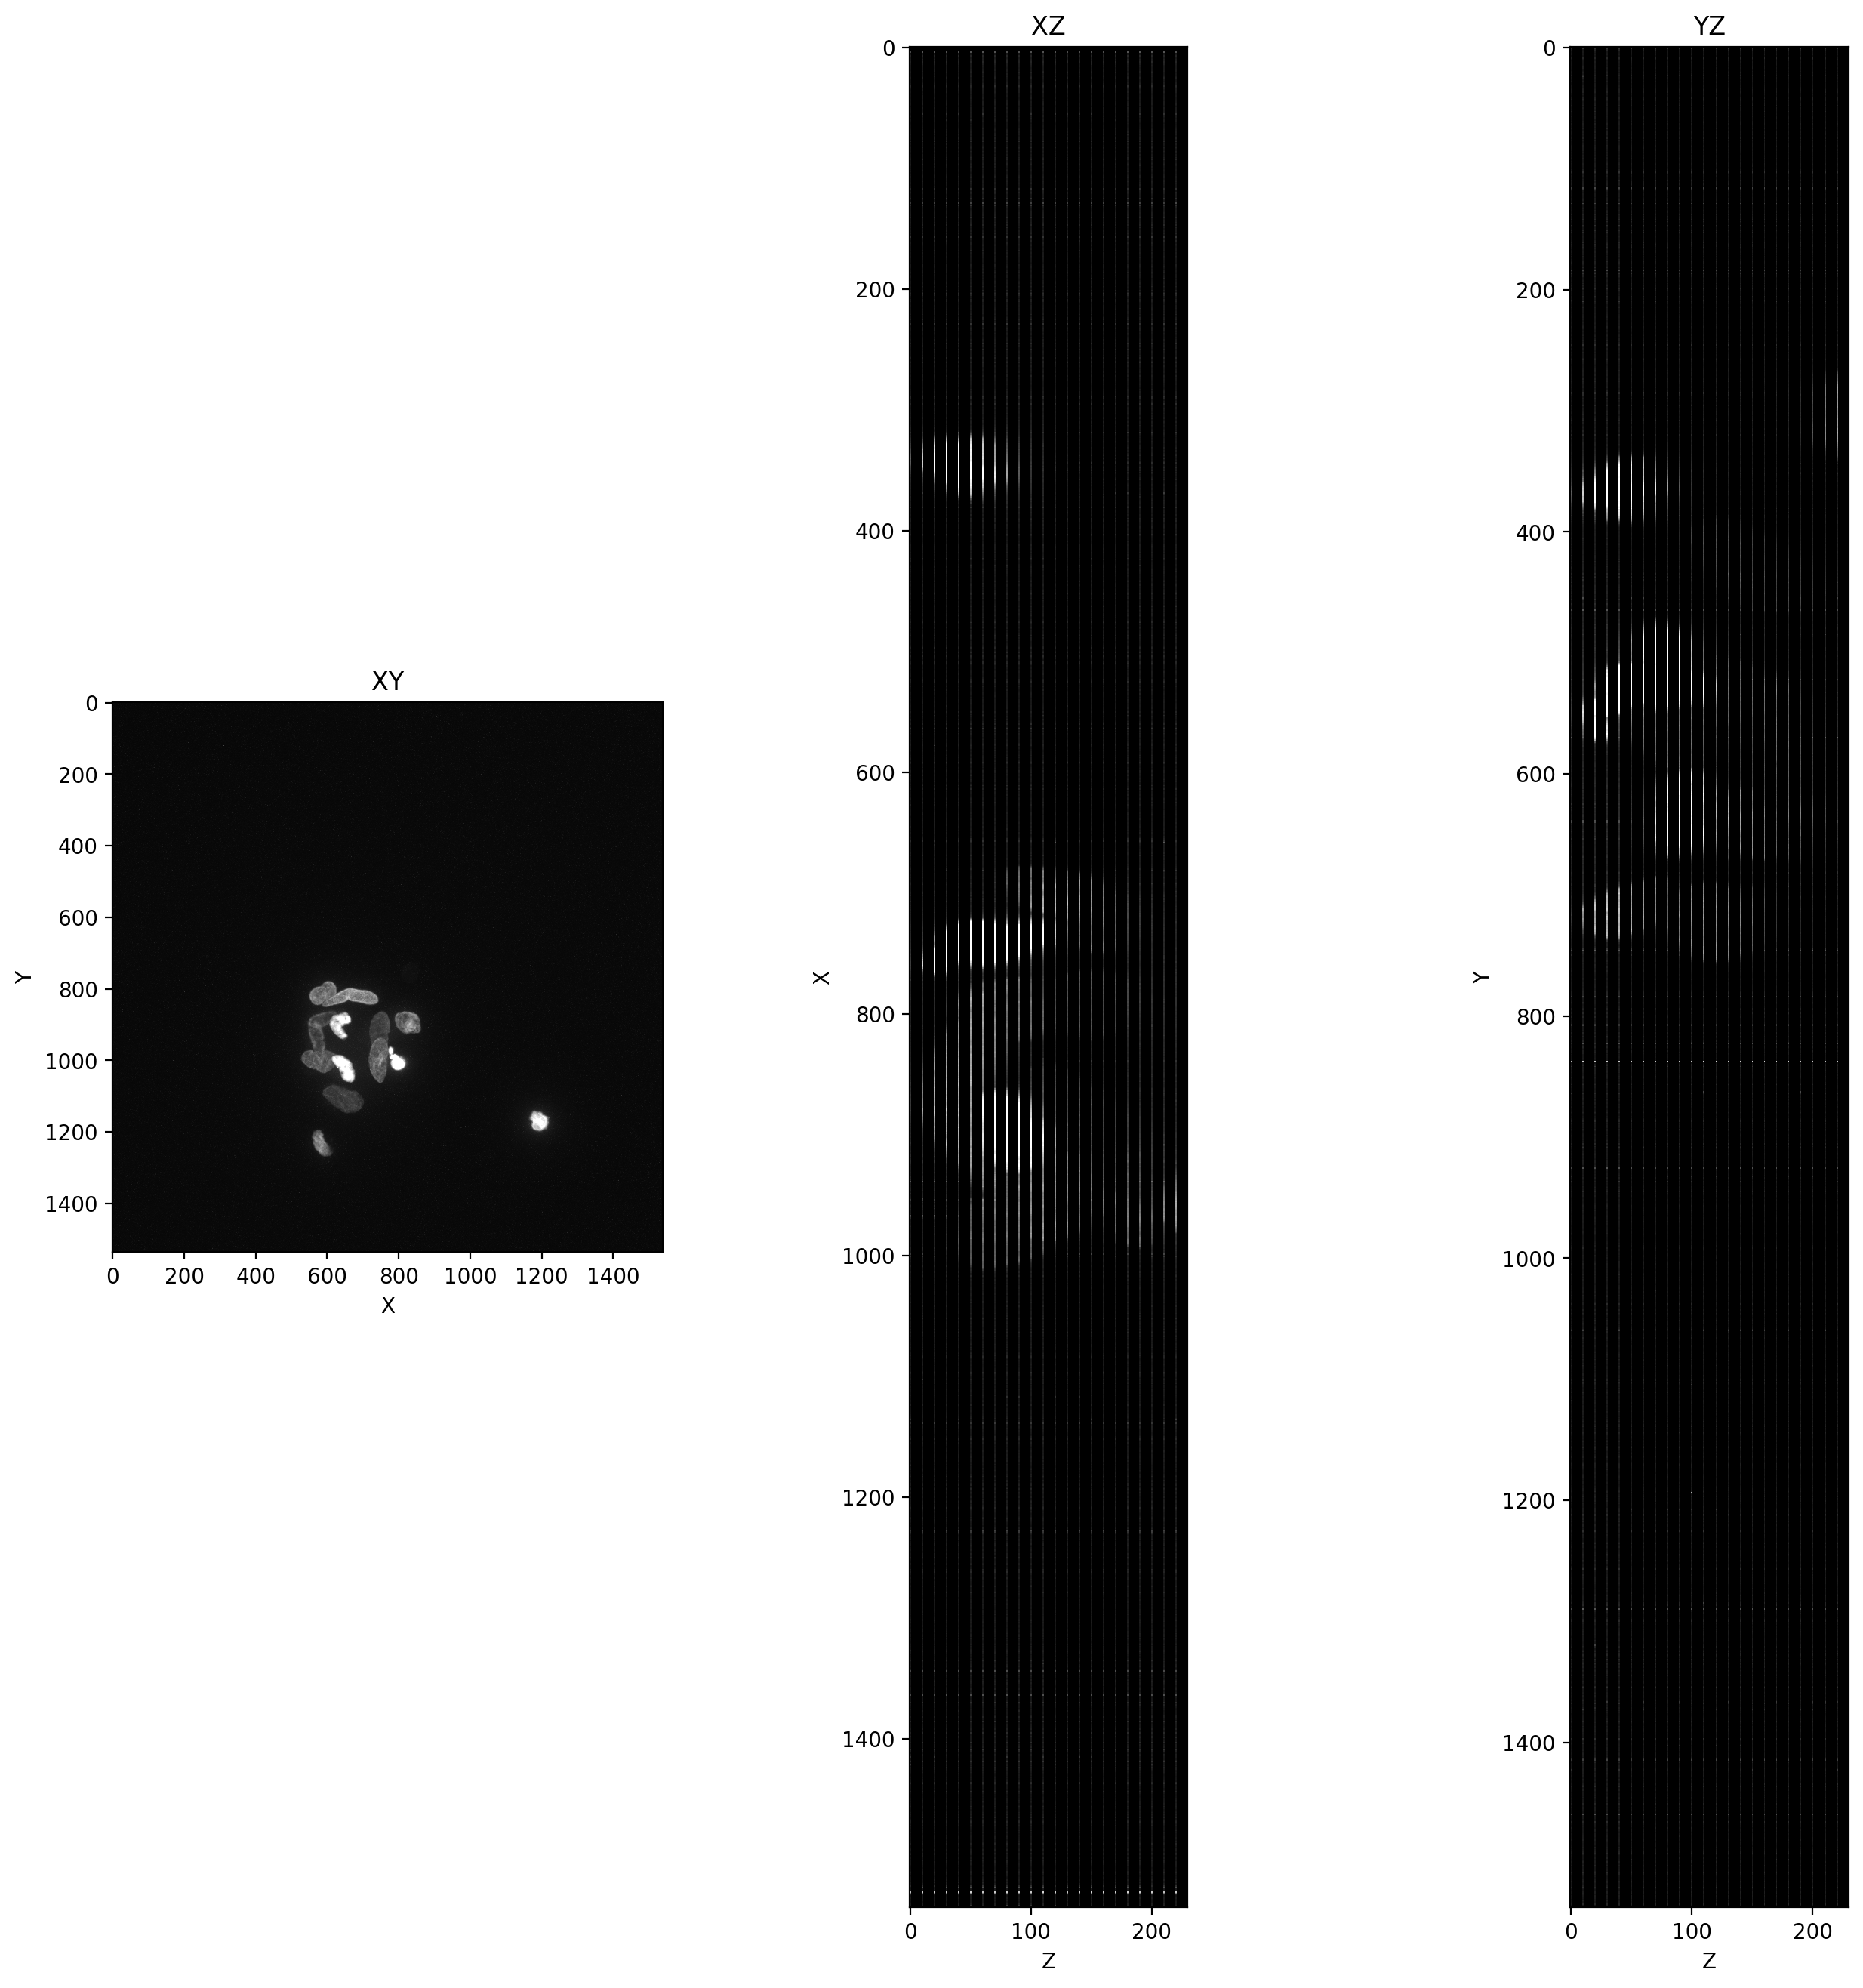

In [46]:
# plot each dimension
plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(new_z_stack.max(axis=0), cmap="gray")
plt.title("XY")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(132)
plt.imshow(new_z_stack.max(axis=1), cmap="gray")
# flip 90 degrees
plt.imshow(np.rot90(new_z_stack.max(axis=1)), cmap="gray")
plt.title("XZ")
plt.xlabel("Z")
plt.ylabel("X")
plt.subplot(133)
plt.imshow(new_z_stack.max(axis=2), cmap="gray")
# flip 90 degrees
plt.imshow(np.rot90(new_z_stack.max(axis=2)), cmap="gray")
plt.title("YZ")
plt.xlabel("Z")
plt.ylabel("Y")
plt.show()